# The Sparks Foundation Data Science & Business Analytics
## Task #1 : Prediction using Supervised ML

### By: Prithvi S Shetty

In [1]:
# Importing Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data from web server
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# Displaying top 5 records of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking for duplicates (Not Necesssary in this case)
#duplicates = data[data.duplicated()]
#print(duplicates)

In [5]:
# Analyzing statistical measures to get better insights of the data.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
### Checking for outliers
### sns.boxplot(data)

In [7]:
# Finding Correlation between two variables
data.corr()               # Here we can see that there is a positive correlation,
                            # We Can conclude when the number of hours per individual increases 
                            #  the scores also increases.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


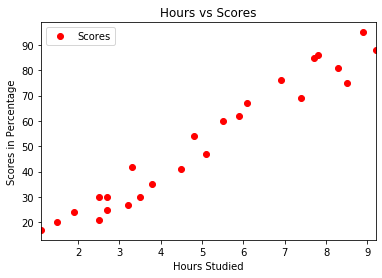

In [8]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o', c='red')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores in Percentage')  
plt.show()
## We can see when hours of study of an individual increases the scores will also increase. 
## This shows positive linear relationship

In [9]:
reshp_X=data['Hours']

In [10]:
# Preparing data for machine learning purpose:
x=reshp_X.values
x= x.reshape((1,-1))
y=data['Scores']

In [11]:
c=x.reshape(-1,1)   # As it was an one dimensional , we will have to reshape it to two dimensional

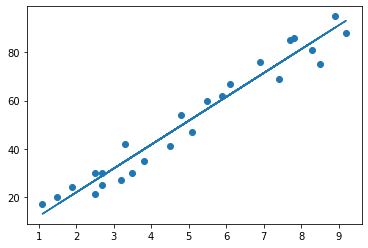

In [12]:
from sklearn.model_selection import train_test_split     # data are randomly selected for train & test set
X_train, X_test, y_train, y_test = train_test_split(c, y, test_size=0.2, random_state=0)     
# 80% of the data is  used for training
# 20% of the data is used for testing
# Random State simply setsa seed to the random generator, so that your train-test splits are always
# deterministic. If you don't set a value your results will differ each time.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  # Calling regression function
regressor.fit(X_train, y_train)       # Fitting your data for training

# Plotting the regression line
line = regressor.coef_*c+regressor.intercept_
# Plotting for the test data
plt.scatter(c, y)
plt.plot(c, line);
plt.show()
y_pred = regressor.predict(X_test)  # Predictions for the testing set of data

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})# Creating a dataframe to compare  
                                                                #  actual  vs predicted
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [41]:
## Model Accuracy Score
from sklearn import metrics 
from sklearn.metrics import r2_score 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) # Model Evaluation
r2_sre= r2_score(y_test,y_pred)
print(" R2 Score ", r2_sre)     #R2 (Coefficient of determination) Best possible score 1

Mean Absolute Error: 4.183859899002982
 R2 Score  0.9454906892105354


In [48]:
## Input your total number of hours studied and predict the score. 


h=np.array(9.25)

h=h.reshape((-1,1))
predt= regressor.predict(h)
print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(predt[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539
